In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=50

In [3]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    
    
)

Found 2152 files belonging to 3 classes.


In [4]:
classes=dataset.class_names

(32, 256, 256, 3)


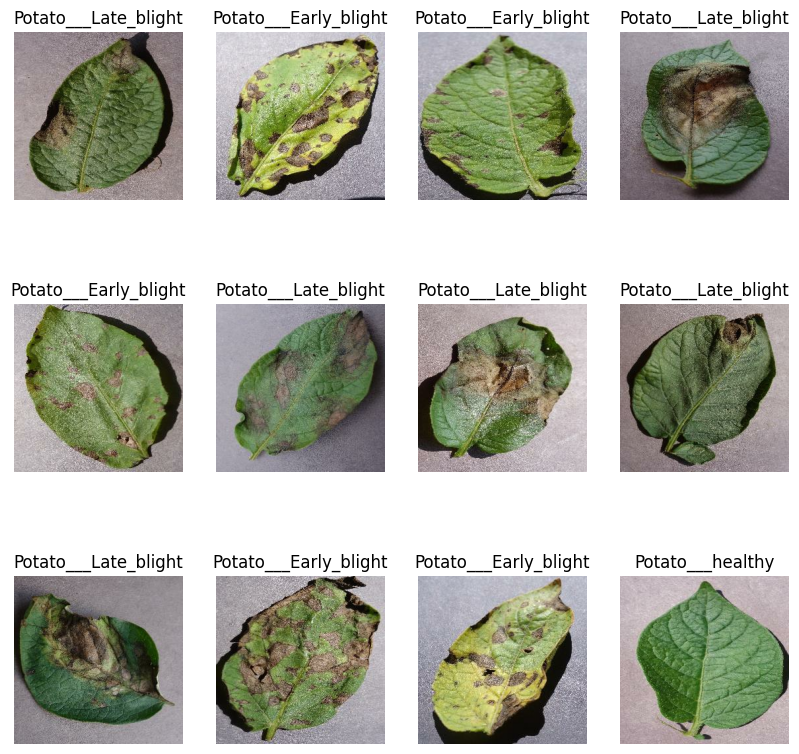

In [5]:
plt.figure(figsize=(10,10))
for image_path,label_batch in dataset.take(1):
    print(image_path.shape)
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.imshow(image_path[i].numpy().astype('uint8'))
               
        plt.axis('off')
        plt.title(classes[label_batch[i]])
 

In [6]:
len(dataset)

68

In [7]:
train_size=0.8
len(dataset)*0.8

54.400000000000006

In [8]:
train_ds=dataset.take(54)

In [9]:
len(train_ds)

54

In [10]:
test_ds=dataset.skip(54)

In [11]:
len(test_ds)

14

In [12]:
val_size=0.1
len(dataset)*0.1

6.800000000000001

In [13]:
val_ds=test_ds.take(6)
len(val_ds)

6

In [14]:
test_ds1=test_ds.skip(6)
len(test_ds1)

8

In [15]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
    val_size=int(ds_size*val_split)
    train_size=int(train_split*ds_size)
    train_ds=ds.take(train_size)
    test_ds=ds.skip(train_size)
    
    val_ds=test_ds.take(val_size)
    test_ds=test_ds.skip(val_size)
    return train_ds,val_ds,test_ds
    

In [16]:
train_ds,val_ds,test_ds=get_dataset_partitions_tf(dataset)

In [17]:
len(train_ds)

54

In [18]:
len(val_ds)

6

In [19]:
len(test_ds)

8

In [20]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [21]:
resize_rescale=tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.Rescaling(1.0/255),
])

In [22]:
#data augmentation
data_augmentation=tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

In [23]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=3
model=models.Sequential([
    resize_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax'),
    
])


C:\Users\ADMIN\tf_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.summary

<bound method Model.summary of <Sequential name=sequential_2, built=False>>

In [25]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [26]:
history=model.fit(train_ds,
          epochs=EPOCHS,
          batch_size=BATCH_SIZE,
          verbose=1,
          validation_data=val_ds)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.4450 - loss: 0.9518 - val_accuracy: 0.4583 - val_loss: 0.9041
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.5167 - loss: 0.8516 - val_accuracy: 0.6354 - val_loss: 0.7949
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 68s 1s/step - accuracy: 0.6908 - loss: 0.6779 - val_accuracy: 0.8646 - val_loss: 0.3708
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 68s 1s/step - accuracy: 0.8337 - loss: 0.4268 - val_accuracy: 0.8750 - val_loss: 0.3174
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.8925 - loss: 0.2650 - val_accuracy: 0.8229 - val_loss: 0.3622
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.9029 - loss: 0.2745 - val_accuracy: 0.9479 - val_loss: 0.1377
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.8977 - loss: 0.2627 - val_accuracy: 0.9479 - val_loss: 0.1329
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.9526 - loss: 0.1319 - val_accuracy: 0.8438 - val_loss:

In [27]:
model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 284ms/step - accuracy: 0.9489 - loss: 0.1491


[0.12121652811765671, 0.95703125]

In [28]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [29]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [30]:
history.history

{'accuracy': [0.49421295523643494,
  0.5491898059844971,
  0.7262731194496155,
  0.8368055820465088,
  0.8842592835426331,
  0.9056712985038757,
  0.9103009104728699,
  0.9421296119689941,
  0.9415509104728699,
  0.9548611044883728,
  0.9646990895271301,
  0.9670138955116272,
  0.9513888955116272,
  0.9820601940155029,
  0.9681712985038757,
  0.9675925970077515,
  0.9803240895271301,
  0.9722222089767456,
  0.9716435074806213,
  0.9849537014961243,
  0.9670138955116272,
  0.9739583134651184,
  0.9866898059844971,
  0.984375,
  0.9895833134651184,
  0.9924768805503845,
  0.9658564925193787,
  0.9866898059844971,
  0.9907407164573669,
  0.9930555820465088,
  0.9328703880310059,
  0.9479166865348816,
  0.9814814925193787,
  0.9872685074806213,
  0.9918981194496155,
  0.9936342835426331,
  0.9918981194496155,
  0.9861111044883728,
  0.9918981194496155,
  0.9913194179534912,
  0.9832175970077515,
  0.9947916865348816,
  0.9936342835426331,
  0.9965277910232544,
  0.9918981194496155,
  0.965

In [31]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

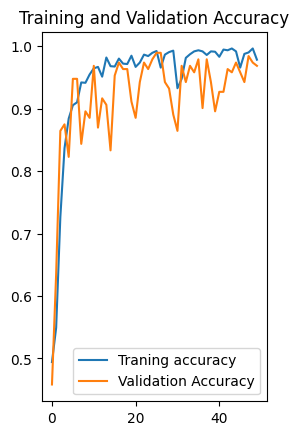

In [32]:
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Traning accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

Text(0.5, 1.0, 'Training and Validation Accuracy')

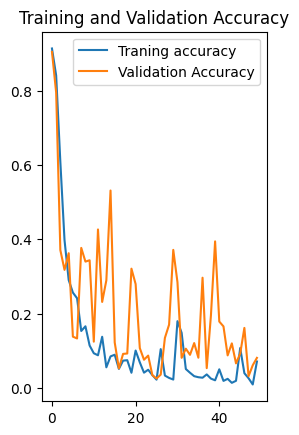

In [33]:
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),loss,label='Traning accuracy')
plt.plot(range(EPOCHS),val_loss,label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

In [35]:
import numpy as np

first image to predict
first label: Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step
Potato___Late_blight


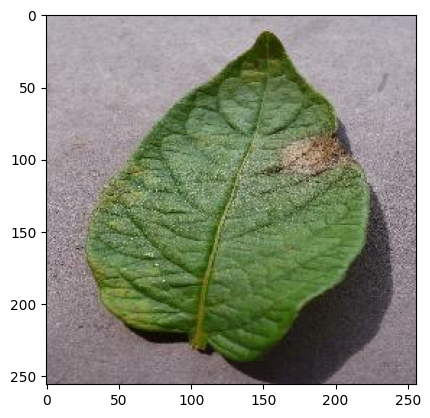

In [36]:
for image_batch,label_batch in dataset.take(1):
    first_image=image_batch[0].numpy().astype('uint8')
    first_label=label_batch[0].numpy()
    print("first image to predict")
    plt.imshow(first_image)
    print("first label:",classes[first_label])
    k=model.predict(image_batch)
    print(classes[np.argmax(k[0])])
    

In [37]:
def predict(model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    image_array=tf.expand_dims(img_array,0)
    predictions=model.predict(image_array)
    predicted_class=classes[np.argmax(predictions[0])]
    confidence=round(100*(np.max(predictions[0])),2)
    return predicted_class,confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


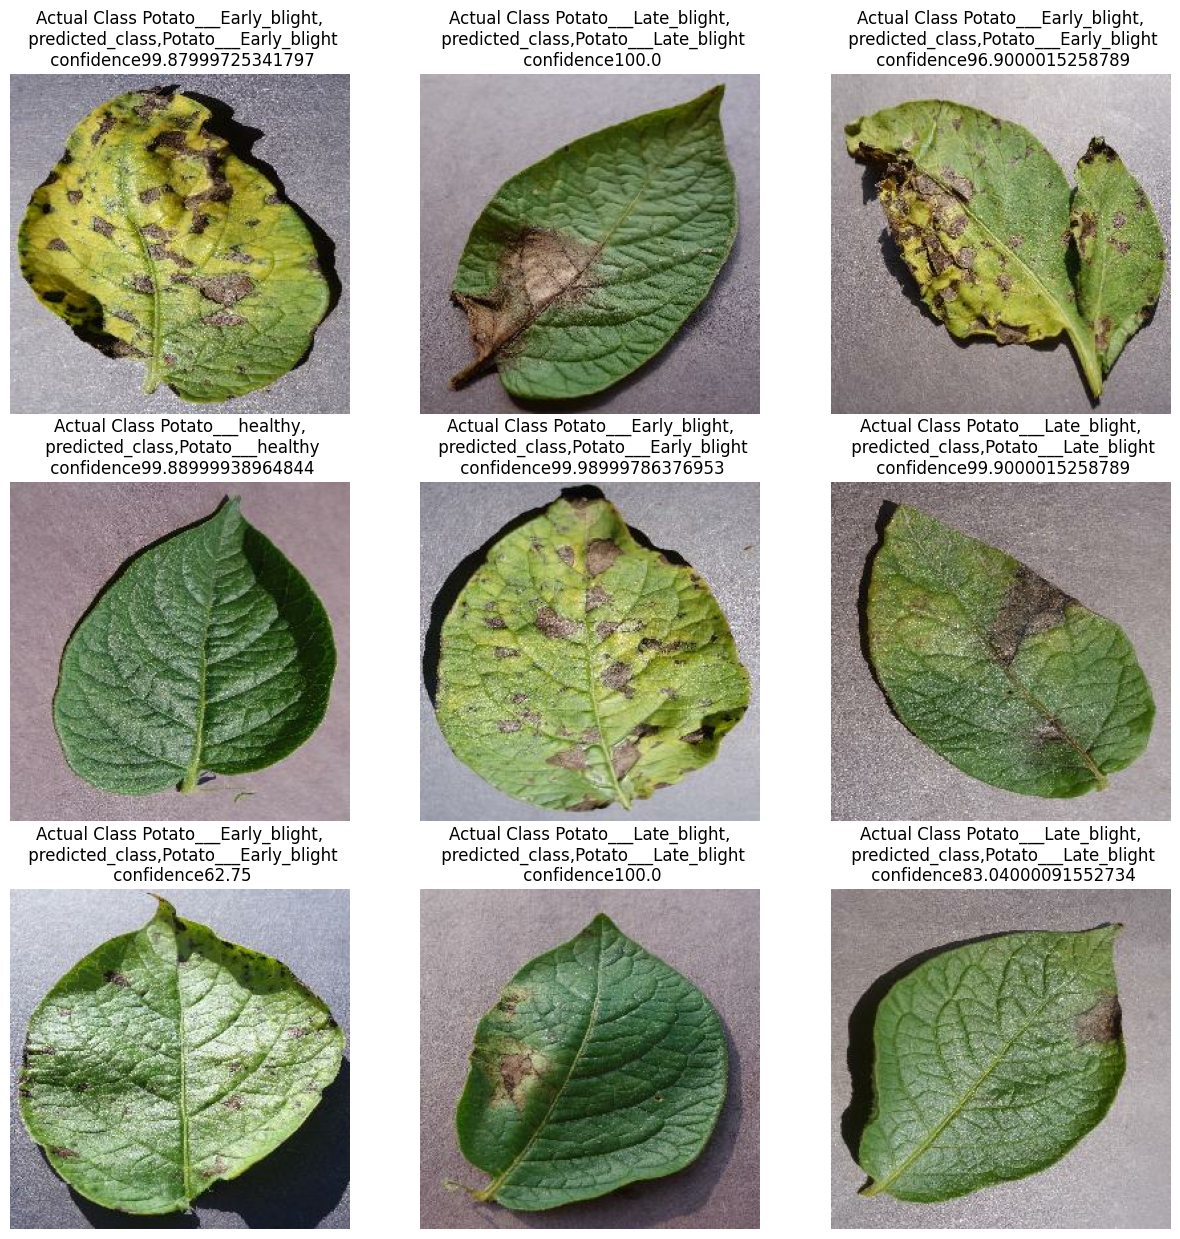

In [38]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")
        predicted_class,confidence=predict(model,images[i].numpy())
        actual_class=classes[labels[i]]
        
        plt.title(f"Actual Class {actual_class},\n predicted_class,{predicted_class}\n confidence{confidence}")

In [40]:
model.save('my_model.keras')
